In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
from scipy import stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

## 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
## 2.Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
## 3. Does the test preparation course seem to have an effect on the exam performances?
## 4. Which 2 exam scores are most correlated with each other?

In [25]:
def print_outliers(df):
    
    print('Continuious Variables', '\n')
    
    for column in df.select_dtypes(include=['int64', 'float64', 'float']):
        print(column)
        for threshold in [95, 90, 85, 80, 75]:
            upper_value = np.percentile(df[column], [threshold])[0]
            print('Beyond the lower {}th percentile there are {} outliers'.format(threshold, 
                len((np.where((df[column] > upper_value))[0]))
            ))
        
        print('\n')
    
    print('Categorical Variables', '\n')
    
    for column in df.select_dtypes(include='object'):
        print(column)
        print('There are {} unique values'.format(df[column].nunique()))
        if df[column].nunique() < 15:
            print(df[column].value_counts())
            print('\n')

In [4]:
def print_nulls(df):
    return df.isnull().sum()*100/df.isnull().isnull().count()

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

query1 = '''
SELECT
  *
FROM
  studentsperformance
'''

df = pd.read_sql_query(query1, con=engine)
engine.dispose()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [26]:
print_outliers(df)

Continuious Variables 

math score
Beyond the lower 95th percentile there are 50 outliers
Beyond the lower 90th percentile there are 95 outliers
Beyond the lower 85th percentile there are 136 outliers
Beyond the lower 80th percentile there are 193 outliers
Beyond the lower 75th percentile there are 229 outliers


reading score
Beyond the lower 95th percentile there are 46 outliers
Beyond the lower 90th percentile there are 100 outliers
Beyond the lower 85th percentile there are 150 outliers
Beyond the lower 80th percentile there are 190 outliers
Beyond the lower 75th percentile there are 249 outliers


writing score
Beyond the lower 95th percentile there are 48 outliers
Beyond the lower 90th percentile there are 98 outliers
Beyond the lower 85th percentile there are 135 outliers
Beyond the lower 80th percentile there are 188 outliers
Beyond the lower 75th percentile there are 235 outliers


Categorical Variables 

gender
There are 2 unique values
female    518
male      482
Name: gende

In [28]:
# winsorize the data to eliminate outliers beyond the .05 bound

winsorized = df.copy()

for column in df.select_dtypes(include=['int64', 'float64', 'float']):
    winsorized[column] = winsorize(df[column], (.05, .05))

In [29]:
print_outliers(winsorized)

Continuious Variables 

math score
Beyond the lower 95th percentile there are 0 outliers
Beyond the lower 90th percentile there are 95 outliers
Beyond the lower 85th percentile there are 136 outliers
Beyond the lower 80th percentile there are 193 outliers
Beyond the lower 75th percentile there are 229 outliers


reading score
Beyond the lower 95th percentile there are 0 outliers
Beyond the lower 90th percentile there are 100 outliers
Beyond the lower 85th percentile there are 150 outliers
Beyond the lower 80th percentile there are 190 outliers
Beyond the lower 75th percentile there are 249 outliers


writing score
Beyond the lower 95th percentile there are 0 outliers
Beyond the lower 90th percentile there are 98 outliers
Beyond the lower 85th percentile there are 135 outliers
Beyond the lower 80th percentile there are 188 outliers
Beyond the lower 75th percentile there are 235 outliers


Categorical Variables 

gender
There are 2 unique values
female    518
male      482
Name: gender, 

<Figure size 1440x1440 with 0 Axes>

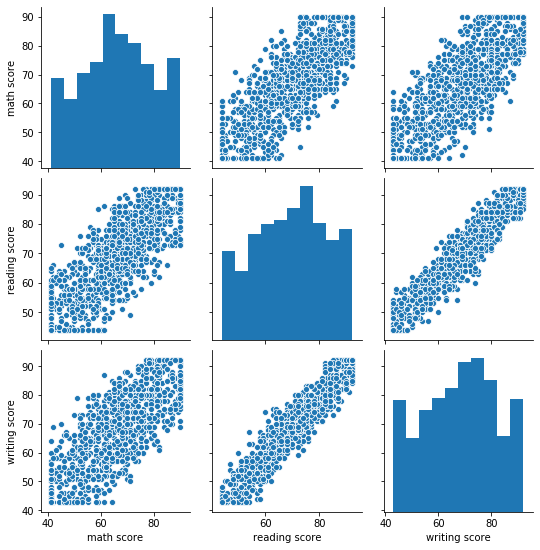

In [68]:
plt.figure(figsize=(20,20))
sns.pairplot(winsorized)

In [72]:
# the data looks more or less normal, lets check
print(stats.describe(winsorized['writing score']), '\n')
print(stats.describe(winsorized['reading score']), '\n')
print(stats.describe(winsorized['math score']))

DescribeResult(nobs=1000, minmax=(43, 92), mean=68.221, variance=193.61977877877877, skewness=-0.1193732921646857, kurtosis=-0.883243713690189) 

DescribeResult(nobs=1000, minmax=(44, 92), mean=69.273, variance=179.55002102102105, skewness=-0.12270504004858043, kurtosis=-0.8612331901810997) 

DescribeResult(nobs=1000, minmax=(41, 90), mean=66.256, variance=188.0365005005005, skewness=-0.059020352729665375, kurtosis=-0.8400832071970443)


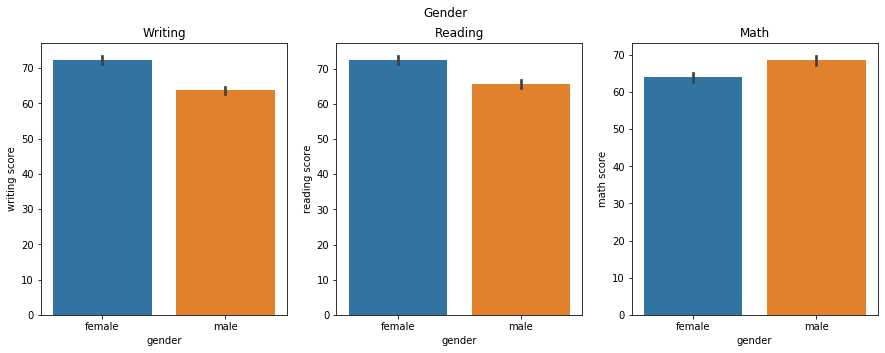

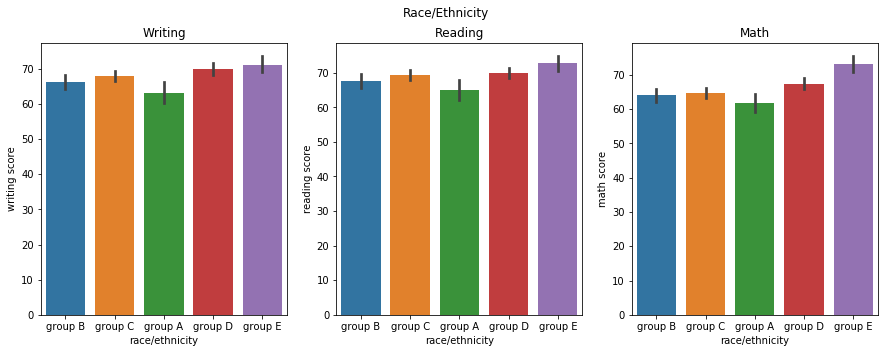

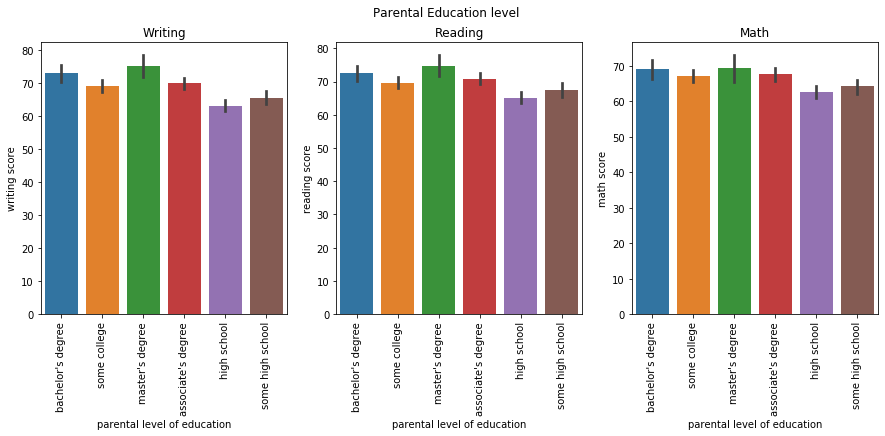

In [40]:
# The data is clean and ready to begin exploration

plt.figure(figsize=(15,5))
plt.suptitle('Gender')
plt.subplot(1, 3, 1)
sns.barplot(winsorized['gender'], winsorized['writing score'])
plt.title('Writing')
plt.subplot(1,3,2)
sns.barplot(winsorized['gender'], winsorized['reading score'])
plt.title('Reading')
plt.subplot(1,3,3)
sns.barplot(winsorized['gender'], winsorized['math score'])
plt.title('Math')
plt.show()

plt.figure(figsize=(15,5))
plt.suptitle('Race/Ethnicity')
plt.subplot(1, 3, 1)
sns.barplot(winsorized['race/ethnicity'], winsorized['writing score'])
plt.title('Writing')
plt.subplot(1,3,2)
sns.barplot(winsorized['race/ethnicity'], winsorized['reading score'])
plt.title('Reading')
plt.subplot(1,3,3)
sns.barplot(winsorized['race/ethnicity'], winsorized['math score'])
plt.title('Math')
plt.show()

plt.figure(figsize=(15,5))
plt.suptitle('Parental Education level')
plt.subplot(1, 3, 1)
sns.barplot(winsorized['parental level of education'], winsorized['writing score'])
plt.xticks(rotation=90)
plt.title('Writing')
plt.subplot(1,3,2)
sns.barplot(winsorized['parental level of education'], winsorized['reading score'])
plt.xticks(rotation=90)
plt.title('Reading')
plt.subplot(1,3,3)
sns.barplot(winsorized['parental level of education'], winsorized['math score'])
plt.xticks(rotation=90)
plt.title('Math')
plt.show()

In [67]:
# compare categorical variables with with pairwise t-tests

scores = ['writing score', 'reading score', 'math score']

variables = ['gender', 'race/ethnicity', 'parental level of education']
for score in scores:
    print(score, '\n'
          , '#######################################################')
    for variable in variables:
        print(variable, '\n'
             , '-----------------------------------------------------')
        categories = winsorized[variable].unique()
        for i in range(len(categories)):
            for j in range(i+1, len(categories)):
                print('t-test results between {}, and {}:'.format(categories[i], categories[j]))
                print(stats.ttest_ind(winsorized[winsorized[variable] == categories[i]][score]
                             , winsorized[winsorized[variable] == categories[j]][score]))
                print('\n')
        print('\n')       

writing score 
 #######################################################
gender 
 -----------------------------------------------------
t-test results between female, and male:
Ttest_indResult(statistic=10.365371451048155, pvalue=5.577126193818096e-24)




race/ethnicity 
 -----------------------------------------------------
t-test results between group B, and group C:
Ttest_indResult(statistic=-1.381044231313725, pvalue=0.16787376872835086)


t-test results between group B, and group A:
Ttest_indResult(statistic=1.7549359000821385, pvalue=0.0803758062903165)


t-test results between group B, and group D:
Ttest_indResult(statistic=-2.8411245447032205, pvalue=0.0046995515226743905)


t-test results between group B, and group E:
Ttest_indResult(statistic=-3.1889299604808494, pvalue=0.0015657429584869658)


t-test results between group C, and group A:
Ttest_indResult(statistic=2.9522724242078717, pvalue=0.003337574871051137)


t-test results between group C, and group D:
Ttest_indResult(s

Ttest_indResult(statistic=3.4345522955061725, pvalue=0.0006934449032040507)


t-test results between master's degree, and some high school:
Ttest_indResult(statistic=2.5255147025722535, pvalue=0.012208974055232353)


t-test results between associate's degree, and high school:
Ttest_indResult(statistic=3.6484575197431384, pvalue=0.0002973500220853858)


t-test results between associate's degree, and some high school:
Ttest_indResult(statistic=2.4036378833266556, pvalue=0.0166882079169975)


t-test results between high school, and some high school:
Ttest_indResult(statistic=-1.0763963719208098, pvalue=0.2824457278422928)






We can see that the difference between the two gender categories is always significant. In the other variables the different categories are sometimes significantly different and sometimes not. 

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [78]:
winsorized.groupby('lunch').describe()

math score                                                      \
                  count       mean        std   min   25%   50%   75%   max   
lunch                                                                         
free/reduced      355.0  59.856338  13.133783  41.0  49.0  60.0  69.0  90.0   
standard          645.0  69.778295  12.722754  41.0  61.0  69.0  80.0  90.0   

             reading score             ...             writing score  \
                     count       mean  ...   75%   max         count   
lunch                                  ...                             
free/reduced         355.0  65.247887  ...  75.0  92.0         355.0   
standard             645.0  71.488372  ...  82.0  92.0         645.0   

                                                                  
                   mean        std   min   25%   50%   75%   max  
lunch                                                             
free/reduced  63.735211  13.617153  43.0  53.0  64.0  74.0  92.0  
standard      70.689922  13.462046  43.0  62.0  72.0  81.0  92.0  

[2 rows x 24 columns]

In [80]:
subsidized = winsorized[winsorized['lunch'] == 'free/reduced']
standard = winsorized[winsorized['lunch'] == 'standard']

In [82]:
for score in scores:
    print(score, '\n'
         , '####################################')
    print('t-test results between subsidized and standard school lunches')
    print(stats.ttest_ind(subsidized[score], standard[score]))
    print('\n')

writing score 
 ####################################
t-test results between subsidized and standard school lunches
Ttest_indResult(statistic=-7.785458939324639, pvalue=1.7324553635394166e-14)


reading score 
 ####################################
t-test results between subsidized and standard school lunches
Ttest_indResult(statistic=-7.2256157602319, pvalue=9.897611350536245e-13)


math score 
 ####################################
t-test results between subsidized and standard school lunches
Ttest_indResult(statistic=-11.665706432421889, pvalue=1.4349082385804919e-29)




There is indeed a significant difference between the two groups across all three scores.

### 3. Does the test preparation course seem to have an effect on the exam performances?

In [86]:
winsorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [87]:
winsorized.groupby('test preparation course').describe()

math score                                          \
                             count       mean        std   min   25%   50%   
test preparation course                                                      
completed                    358.0  69.413408  13.288104  41.0  60.0  69.0   
none                         642.0  64.495327  13.639696  41.0  54.0  64.0   

                                     reading score             ...        \
                           75%   max         count       mean  ...   75%   
test preparation course                                        ...         
completed                79.00  90.0         358.0  73.533520  ...  84.0   
none                     74.75  90.0         642.0  66.897196  ...  76.0   

                              writing score                                    \
                          max         count       mean        std   min   25%   
test preparation course                                                         
completed                92.0         358.0  74.078212  12.600499  43.0  66.0   
none                     92.0         642.0  64.954829  13.545652  43.0  54.0   

                                           
                          50%   75%   max  
test preparation course                    
completed                76.0  83.0  92.0  
none                     65.0  74.0  92.0  

[2 rows x 24 columns]

In [88]:
prep_completed = winsorized[winsorized['test preparation course'] == 'completed']
no_prep = winsorized[winsorized['test preparation course'] == 'none']

for score in scores:
    print(score, '\n'
         , '####################################')
    print('t-test results between preparation course completed and not')
    print(stats.ttest_ind(prep_completed[score], no_prep[score]))
    print('\n')

writing score 
 ####################################
t-test results between preparation course completed and not
Ttest_indResult(statistic=10.466154647259794, pvalue=2.1453616116747396e-24)


reading score 
 ####################################
t-test results between preparation course completed and not
Ttest_indResult(statistic=7.72573235775142, pvalue=2.7005362238177588e-14)


math score 
 ####################################
t-test results between preparation course completed and not
Ttest_indResult(statistic=5.516826930225408, pvalue=4.3979289425100825e-08)




We see a significant difference between these two groups across all three tests.

### 4. Which 2 exam scores are most correlated with each other?

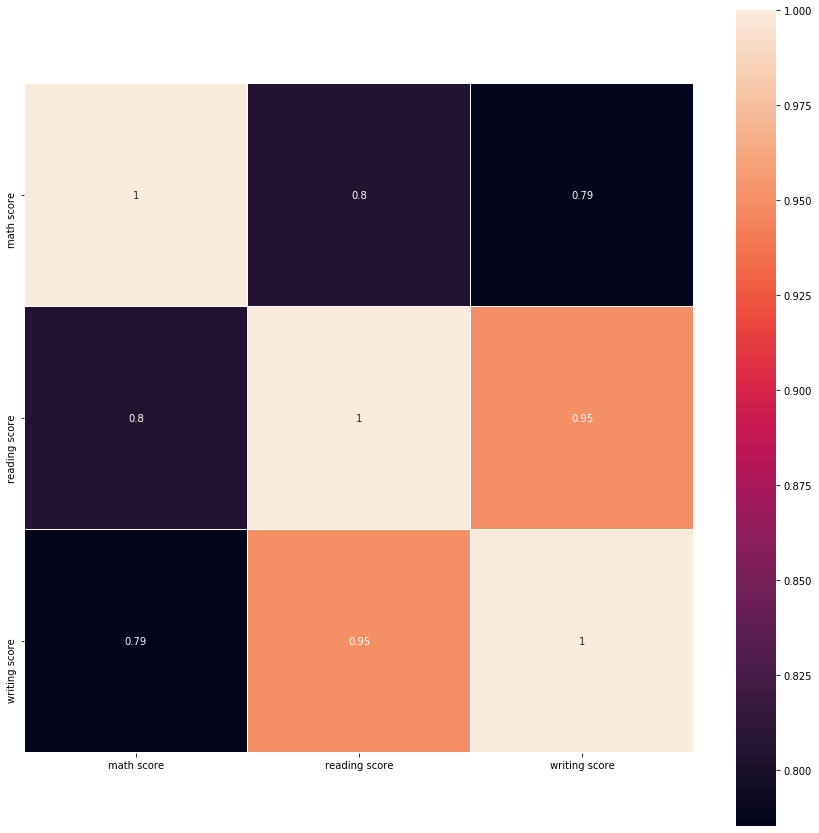

In [73]:
# we can use a heat map to visualize this
corr_map = winsorized.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_map, square=True, annot=True, linewidths=.5)

In this case I might look into combing these two scores during feature engineering since they are so closely corelated. We could average the two scores into something like a language score.